# 4장 신경망 학습
  - 4.1 데이터에서 학습한다.
  - 4.2 손실 함수
  - 4.3 수치 미분
  - 4.4 기울기
  - 4.5 학습 알고리즘 구현하기

## 4.1 데이터에서 학습한다.

학습 (지도학습을 사용함)
 - 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

손실함수 (오차를 구함)
 - 신경망이 학습할 수 있도록 해주는 지표

학습의 목표 - **오차가 가장 적게하는 매개 변수의 값을 찾는 것**
 - 손실 함수의 결과값을 가장 작게 만드는 가중치 매개 변수 값을 찾는 것

경사강하법
 - 손실 함수의 값을 가급적 작게 만드는 기법
 - 함수의 기울기를 활용 - 오차에 대한 미분을 구하고 매개변수에서 오차를 줄이는 방향으로 연산한다.

### 4.1.1 데이터 주도 학습

  - 기계학습은 데이터가 생명이다. (데이터는 경험이라 볼수 있다.)
  - 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것

그림 4-1 손글씨 숫자 '5'의 예 : 사람마다 자신만의 필체가 있다.

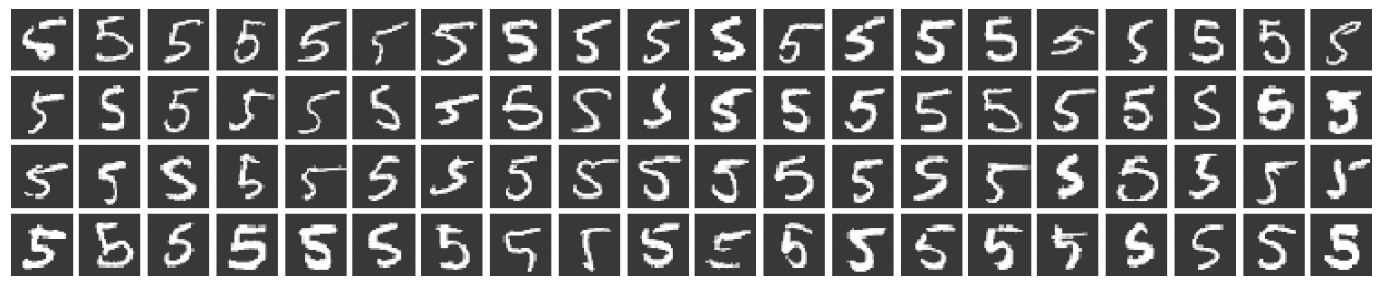

그림 4-2 '사람'손으로 규칙만들기에서 '기계'가 데이터로 부터 배우는 방식으로의 패러다임 전환 : 회색 블록은 사람이 개입하지 않음을 뜻한다.

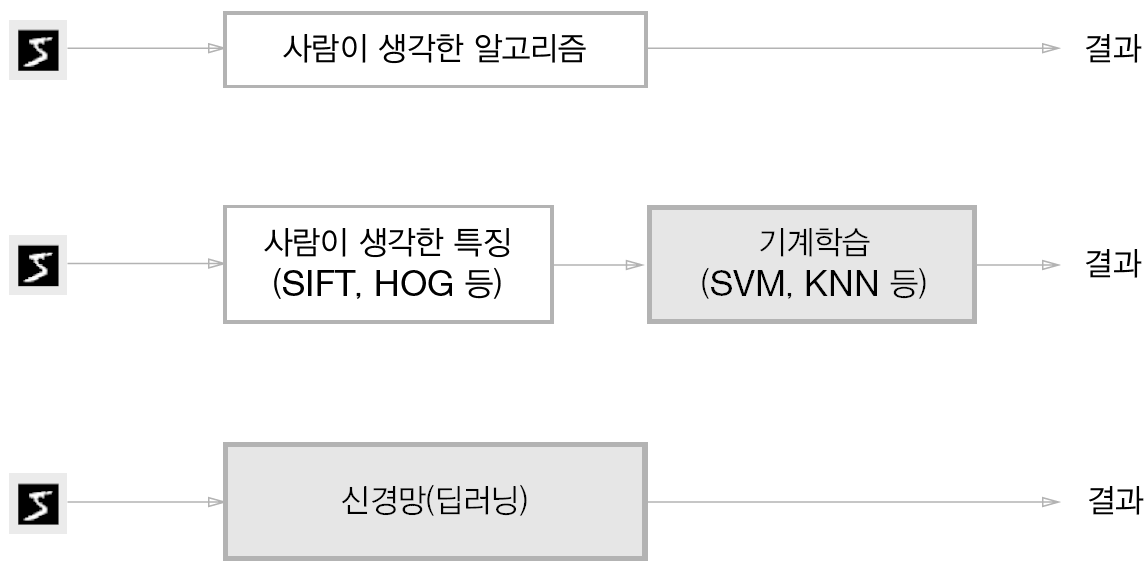

###4.1.2 훈련데이터와 시험 데이터
  - 훈련데이터를 사용하여 학습하면서 최적의 매개변수를 찾는다.
  - 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가한다.

  - 범용 능력을 제대로 평가하기 위해 훈련데이터와 시험데이터를 분리
  - 범용 능력이란 아직 보지 못한 즉 훈련 데이터에 포함되지 않은 데이터로 문제를 올바르게 풀어내는 능력

  - 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다.
  - 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는 엉망인 일도 벌어진다.
  - 한 데이터셋에만 지나치게 최적화된 상태를 오버피팅이라 한다.

##4.2 손실 함수
 - **오차를 구함**
 - loss function / cost function / object fucntion
 - 신경망 학습에서 사용하는 지표 - 학습이 잘 진행되고 있는지 판단
 - 평균 제곱 오차(선형)와 교차 엔트로피(비선형) 오차 사용

###4.2.1 평균 제곱 오차

- Mean Square Error
---
$$MSE=\frac{1}{2}{\sum_{i=1}^n (Y_{i} - \bar Y_{i})^2}$$



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]                         # one hot encoding에 대한 개념 이해 필요
y = [0.05, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

In [ ]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
# 4.2.1 평균 제곱 오차
# E = 1/2 * ∑ _k (yk-tk)²
# yk : 신경망의 출력
# tk : 정답 레이블
# k : 데이터의 차원 수
mse = mean_squared_error(np.array(y), np.array(t))
print(mse)  # 0.09375

0.09375000000000003


### 4.2.2 교차 엔트로피 오차


- Corss Entropy Error
---
$$CEE={- \sum_{i=1}^n    t_{i}  \log(y_{i})}$$

  - 여기에서 log는 밑이 e인 자연로그
  - y는 신경망의 출력, t는 정답 레이블
     - 정답레이블은 정답에 해당하는 인덱스의 값만 1이고 나머지는 0

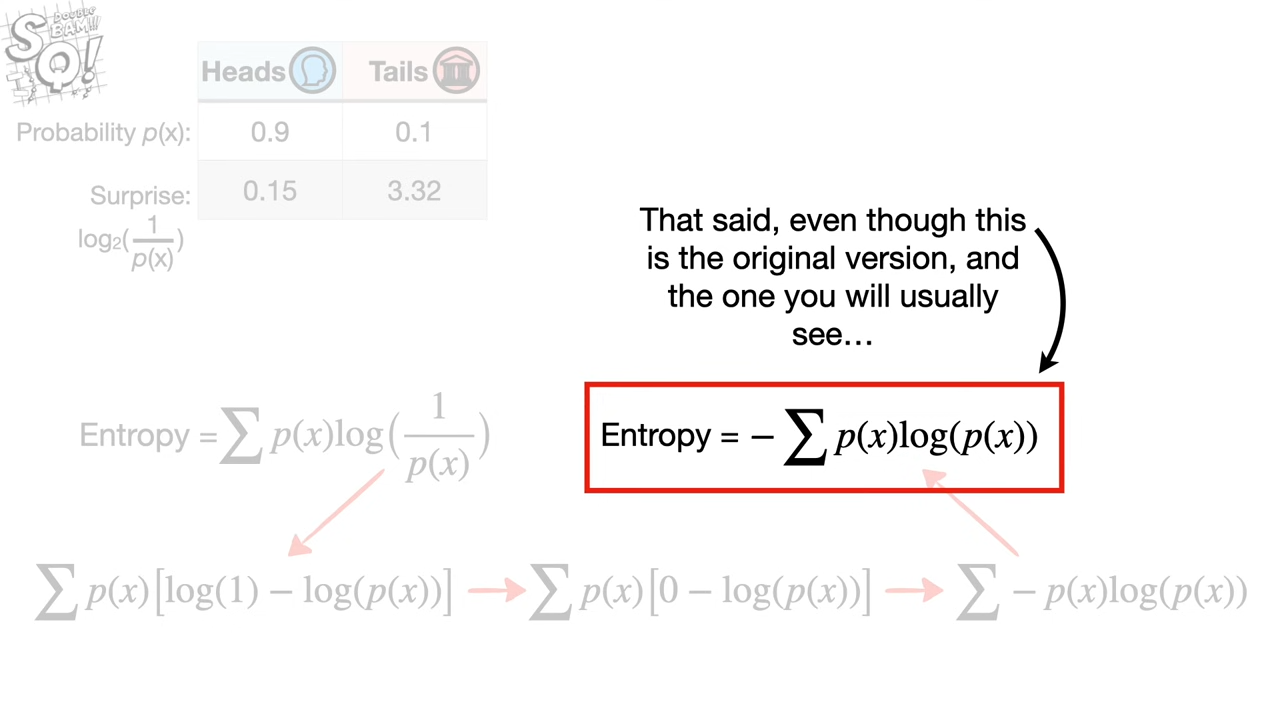

그림 4-3 자연로그 y=logx의 그래프

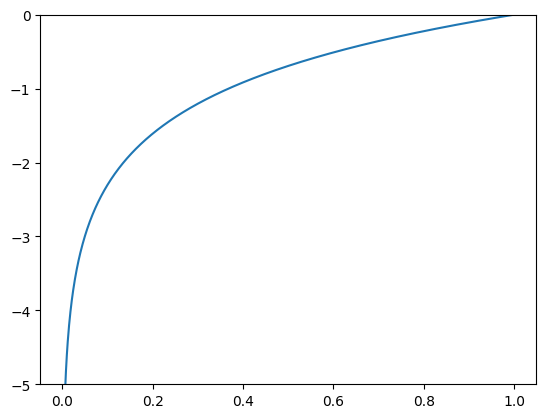

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()

x가 1일 때 y는 0이 되고 x가 0에 가까워질 수록 y의 값은 점점 작아짐

- 교차 엔트로피 구현

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7                          # 0일때 -무한대가 되지 않기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 정답 1 오답 0
y_1 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
# 3번째 값만 cross entropy
cee = cross_entropy_error(np.array(y_1), np.array(t))

print("handmade :",end=' ')
# 정답일때의 y값만 반영한 결과
print(-np.log(0.1))
print("using_cee:",end= ' ')
print(cee)  # 0.510825457099
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee = cross_entropy_error(np.array(y), np.array(t))
print(cee)  # 2.30258409299

handmade : 2.3025850929940455
using_cee: 2.3025840929945454
2.3025840929945454


### 4.2.3 미니배치 학습
 - 지금까지는 데이터 하나에 대한 손실함수를 고려함
 - 훈련데이터 모두에 대한 손실함수의 합을 구해야 함
 - 평균 손실함수를 구함
 - 일부를 추려 전체의 근사치로 이용
 - 훈련데이터로 부터 일부만 골라 학습 수행

Mni batch

---

$$CEE={- \frac{1}{N} \sum_{n} \sum_{k}   t_{nk}  \log(y_{nk})}$$

 - MNIST 데이터셋은 훈련데이터 60,000개
 - 모든 데이터를 대상으로 손실함수의 합을 구하려면 시간이 걸림
 - 빅데이터 수준이면 전체 손실함수의 합을 구하면 시간이 상당히 걸림
 - 이 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 현실적이지 않다.
 - 데이터 일부를 추려 전체의 근사치로 이용
 - 이를 미니배치라 한다.

 - 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장을 학습하는 것을 말한다. 이러한 학습 방법을 미니배치 학습이라고 한다.

무작위로 골라내는 코드 작성
  - MNIST를 다운로드 받아서 10개의 데이터를 무작위로 선택하는 코드

   - MNIST 다운로드

In [ ]:
import tensorflow as tf
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
t_train=tf.keras.utils.to_categorical(t_train)
x_train=x_train.reshape(60000,-1)

print(x_train.shape)
print(t_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 784)
(60000, 10)


    - 10개의 데이터 셋 추출

In [ ]:
train_size = x_train.shape[0]         #
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch)
print(t_batch)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


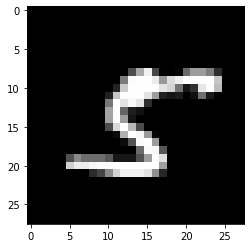

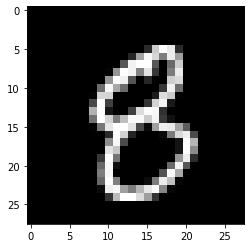

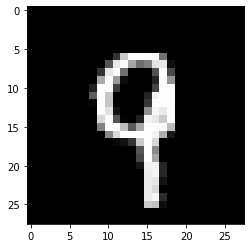

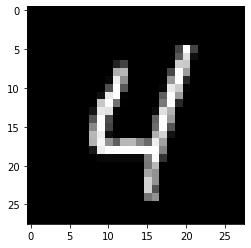

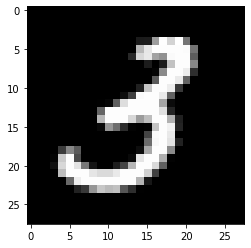

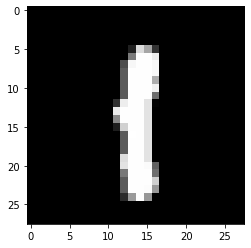

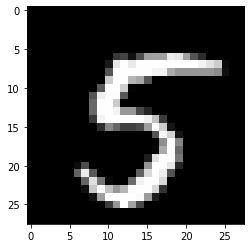

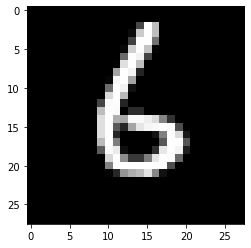

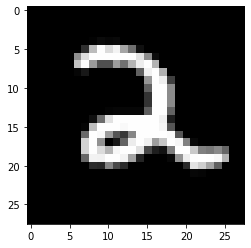

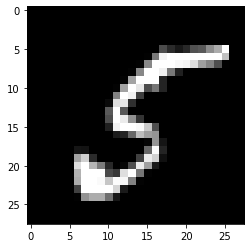

In [ ]:
for i in range(10):
    img = x_batch[i].reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
np.random.choice(60000, 10)  # 60000개 중에 10개 무작위 선택

array([29516, 56950, 38115, 11570, 29764,  9797, 40477, 38289,  2033,
       49610])

###4.2.4 (배치용)교차 엔트로피 오차 구현하기

 - 배치의 크기로 나누어 오차를 구한다.(batch_size)


In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size   ##### 이부분을 수정함

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:                # batch가 1인 경우는 1차원으로 결과가 나온다.
        t = t.reshape(1, t.size)   # 2차원으로 변경
        y = y.reshape(1, y.size)   # 2차원으로 변경
        #정답 t가 2차원으로 되어져 있어서 차원을 맞추어야 합니다.

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    #if t.size == y.size:
    #    t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

 - 정답에 해당하는 값이 1이고 나머지는 0 이므로 정답에 해당하는 값만 구하면 된다.
 - batch_size = 5
 - np.arange(batch_size)는 [0, 1, 2, 3, 4] 넘파이 배열 생성
 - t에는 레이블 [2, 7, 0, 9, 4]
 - y[np.arange(batch_size),t]는 [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]

###4.2.5 왜 손실 함수를 설정하는가?

  - 정확도와 오차 중에 오차를 기준으로 매개변수를 값을 변화시킨다.
  - 정확도는 매개변수의 미소한 변화에는 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다.

  - 신경망 학습에서는 최적의 매개변수(가중치 w와 편향 b)를 탐색할 때 손실 함수 값을 가능한 작게하는 매개변수를 찾는다.
  - 오차에 대한 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정 반복
    - 미분 값이 음수이면 그 가중치 매개변수를 양의 방향으로 약간 감소
    - 미분 값이 양수이면 그 가중치 매개변수를 음의 방향으로 약간 증가
    - 미분값이 0이면 증가도 감소도 하지 않고 유지됨

그림 4-4 계단 함수와 시그모이드 함수 : 계단 함수는 대부분의 위치에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)는 0이 아니다.

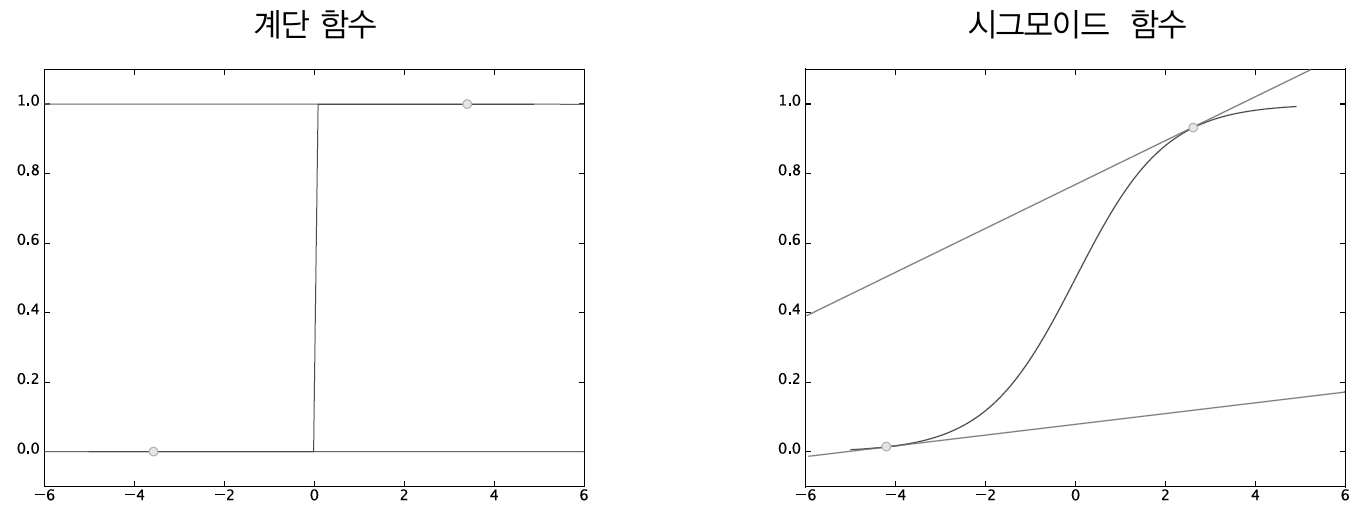

  - 계단함수의 미분은 O인곳을 제외하고 0이다. 그러므로 손실함수(오차)를 지표로 삼는 것에 아무런 의미가 없다.
  - 시그모이드 함수의 미분은 어느 장소라도 0이 되지 않는다.
    - 이는 신경망 학습에서 중요한 성질로, 기울기가 O이 되지 않는 덕분에 신경망이 올바르게 학습할 수 있는 것이다.

## 4.3 수치 미분
  - 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.
  - 기울기를 알아내는 미분에 대하여 복습한다.

###4.3.1 미분

  - 미분은 한순간의 변화량을 표시한다.
  - 한순간은 시간의 간격이 아주 적은 시간의 차이를 의미

 수치 미분

---

$$\dfrac{df(x)}{dx}=\lim_{h\to 0} \frac{f(x + h) - f(x)}{h} $$

  - 좌변은 f(x)의 x에 대한 미분을 나타내는 기호
  - x의 작은 변화가 함수 f(x)를 어떻게 변화시키느냐를 의미함
  - 이 때 시간의 변화, 즉 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미

  - **반올림 오차를 주의해야 하며 진정한 미분이 아니므로 중심차분으로 계산해야하는 것에 주의해야 한다.**

In [ ]:
#나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / (h)

  - 너무 작은 h 값은 반올림 오차를 유발 시킨다.
    - 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 발생한다.

In [ ]:
np.float32(1e-50)

0.0

  - 반올리 오차가 발생하므로 1e-4 정도가 적당하다.

그림 4-5 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다.

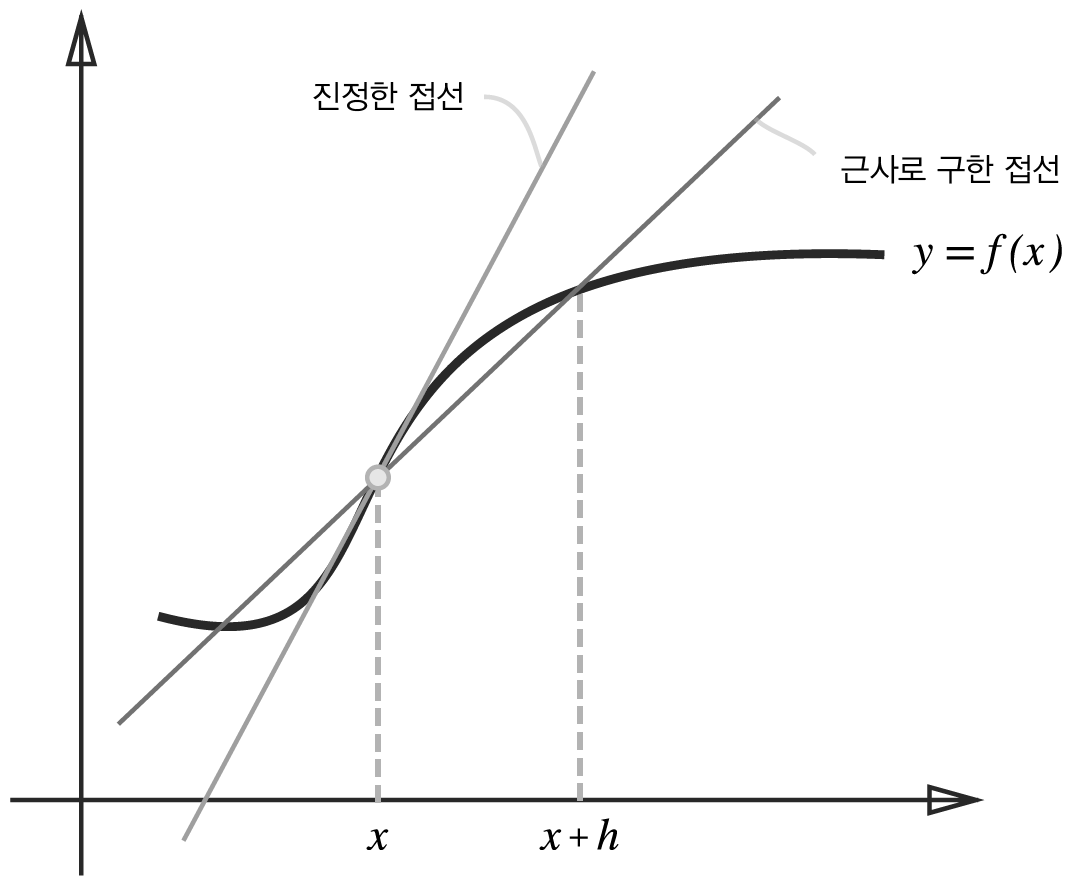

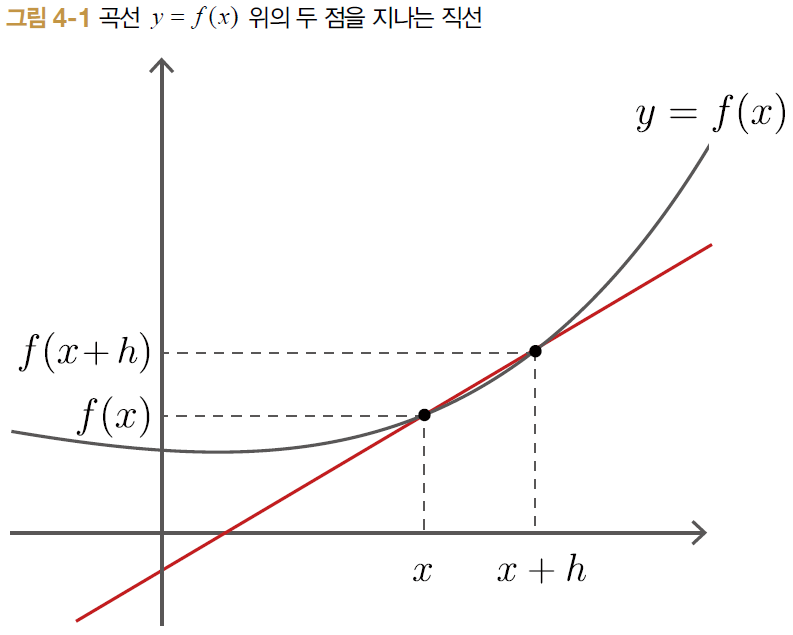

  - 프로그램으로는 h를 무한히 좁이는 것이 불가능하다.
  - h 사이에서 변화가 있으면 기울기 값의 왜곡이 발생한다.

$$\dfrac{df(x)}{dx}=\lim_{h\to 0} \frac{f(x + h) - f(x-h)}{2h} $$

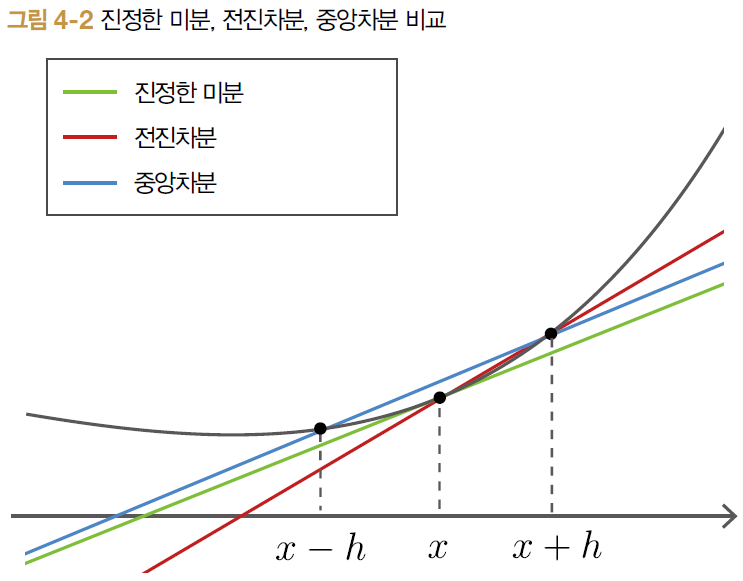

  - 수치 미분에서 오차를 줄이기 위해 (x + h)와 (x - h) 일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.
  - 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 **중심 차분** 또는 **중앙 차분**이라 한다.

In [ ]:
def numerical_diff(f, x):
    h = 10e-4
    return (f(x + h) - f(x - h)) / (2 * h)

###4.3.2 수치 미분의 예

$$ y=0.01x^2 + 0.1x$$

  - 공식에 의한 미분은 0.02x + 0.1
    - 5인 경우 0.2
    - 10인 경우 0.3

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

그림 4-6 식 f(x)= 0.01x^2 + 0.1x의 그래프

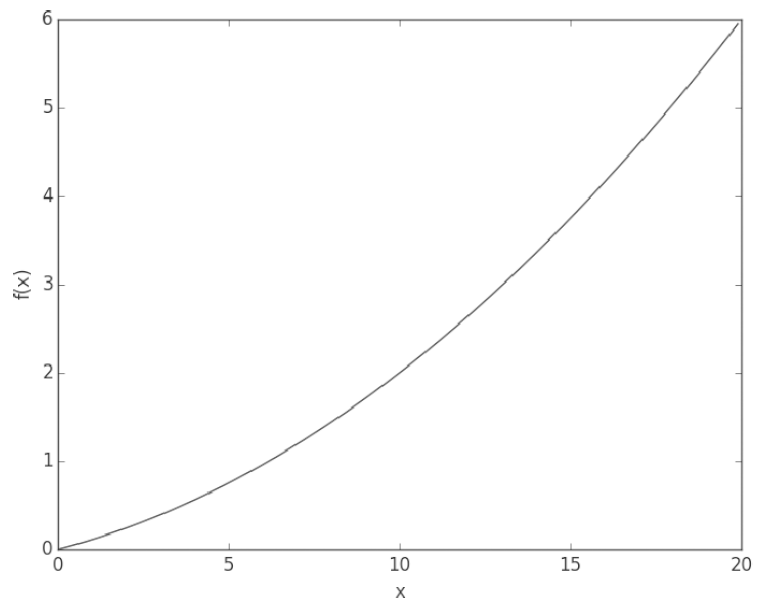

In [ ]:
# 0.02 x 5 + 0.1 = 0.2
numerical_diff(function_1, 5)

0.200000000000089

In [ ]:
# 0.02 x 10 + 0.1 = 0.3
numerical_diff(function_1, 10)

0.29999999999996696

그림 4-7 x=5, x=10에서의 접선 : 직선의 기울기는 수치 미분에서 구한 값을 사용하였다

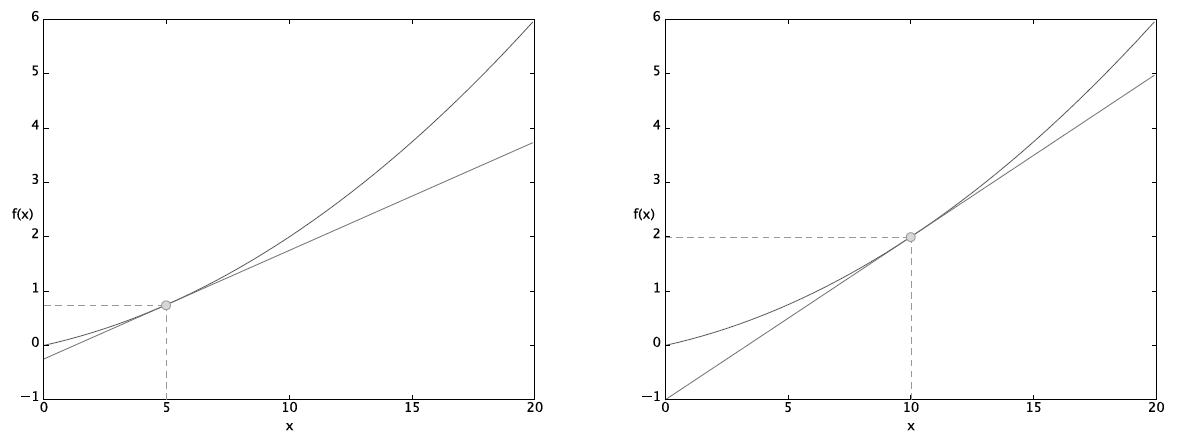

부록 : 접점에서의 기울기 구하는 코드


$$ y=0.01x^2 + 0.1x$$

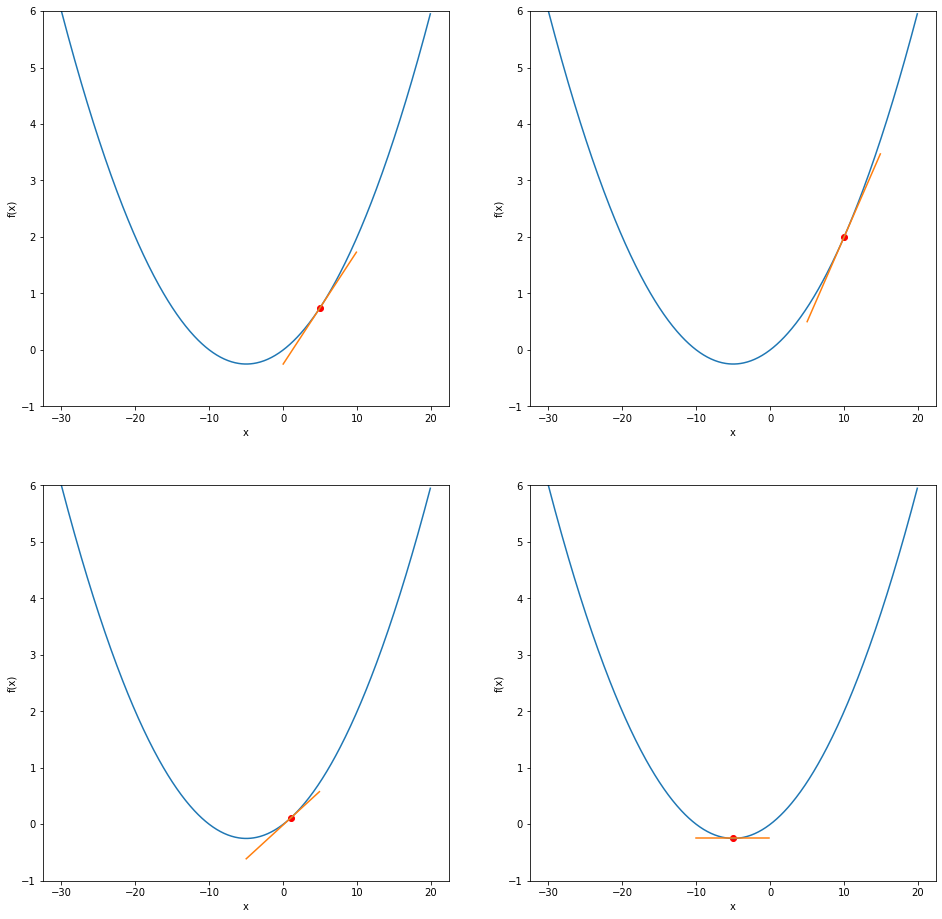

In [ ]:
import numpy as np
import matplotlib.pylab as plt
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)
    # 접점에서의 기울기
    # 미분값



def function_1(x):
    return 0.01*x**2 + 0.1*x
    #0.01 x2 + 0.1x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y #아래와 같음
    #return d*t + y


x = np.arange(-30.0, 20.0, 0.1)
y = function_1(x)


# first
plt.figure(figsize=(16, 16))
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.subplot(221)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-1,6)
plt.plot(x, y)
plt.plot(x[300:400],y2[300:400])
plt.scatter(5,function_1(5),c='r')



# second
tf_2=tangent_line(function_1, 10)
y3=tf_2(x)

plt.subplot(222)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-1,6)
plt.scatter(10,function_1(10),c='r')
plt.plot(x, y)
plt.plot(x[350:450],y3[350:450])


#third
tf_2=tangent_line(function_1, 1)
y3=tf_2(x)

plt.subplot(223)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-1,6)
plt.scatter(1,function_1(1),c='r')
plt.plot(x, y)

plt.plot(x[250:350],y3[250:350])


#forth
#plt.figure(figsize=(16, 16))
tf_2=tangent_line(function_1, -5)
y4=tf_2(x)
plt.subplot(224)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-1,6)
plt.scatter(-5,function_1(-5),c='r')
plt.plot(x, y)

plt.plot(x[200:300],y4[200:300])
plt.show()

---

###4.3.3 편미분


  - 변수가 두개라는 것에 주의
  - 그래프를 그리면 3차원으로 그려진다.

$$f(x_0, x_1) = x_0^2 + x_1^2$$



In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return sum(x**2)

그림 4-8 $$f(x_0, x_1) = x_0^2 + x_1^2$$의 그래프

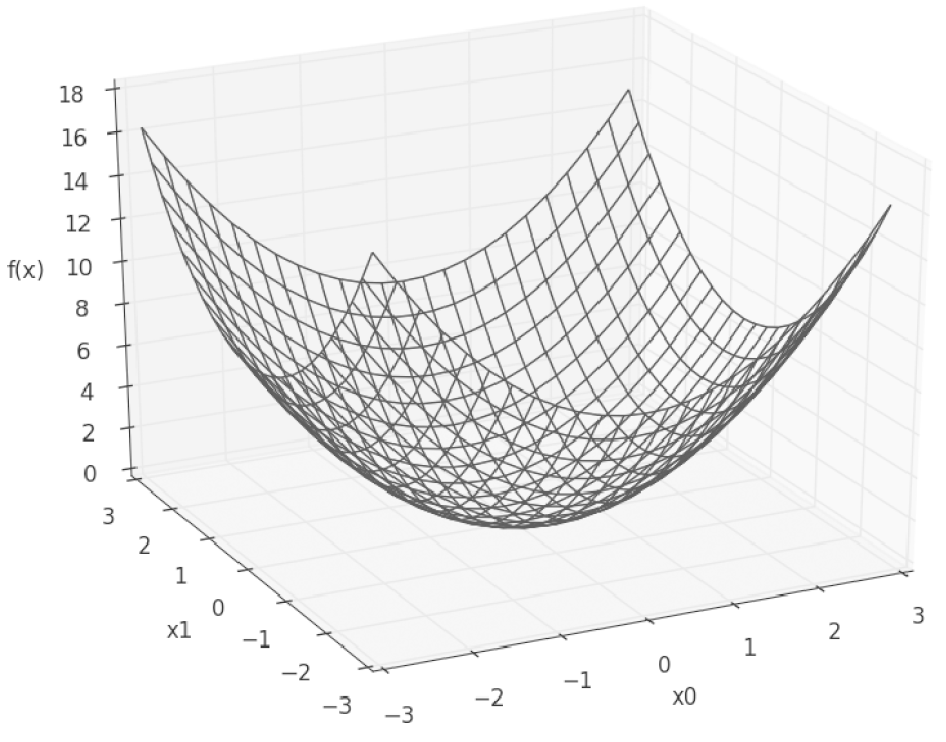

  - 어느 변수에 대한 미분이냐, 즉 x0와 x1 중 어느 변수에 대한 미분이냐를 구분해야 한다.
  - 변수가 여러개인 함수에 대한 미분을 편미분이라고 한다.
  - 수식으로 아래와 같다.
  $$ \dfrac{\partial f}{\partial x_{0}} , \dfrac{\partial f}{\partial x_{1}}$$



  - 여러개의 변수에서 한개를 변수로 선택하고 나머지를 상수처럼 처리해서 미분값을 구한다.

##4.4 기울기

In [ ]:
def numerical_gradient(f, x):
   #점에서의 기울기 계산
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        #print("fx1:")
        #print(fxh1,fxh2)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        #print(grad[idx])
        x[idx] = tmp_val  # 값 복원
    return grad

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

In [ ]:
# 이 아래에서 print 값은 x[0] 편미분 값 x[1] 편미분값
print(numerical_gradient(function_2, np.array([3.0, 4.0])))  # [ 6.  8.]
print(numerical_gradient(function_2, np.array([0.0, 2.0])))  # [ 0.  4.]
print(numerical_gradient(function_2, np.array([3.0, 0.0])))  # [ 6.  0.]

[6. 8.]
[0. 4.]
[6. 0.]


그림 4-9 $$f(x_0, x_1) = x_0^2 + x_1^2$$의 기울기

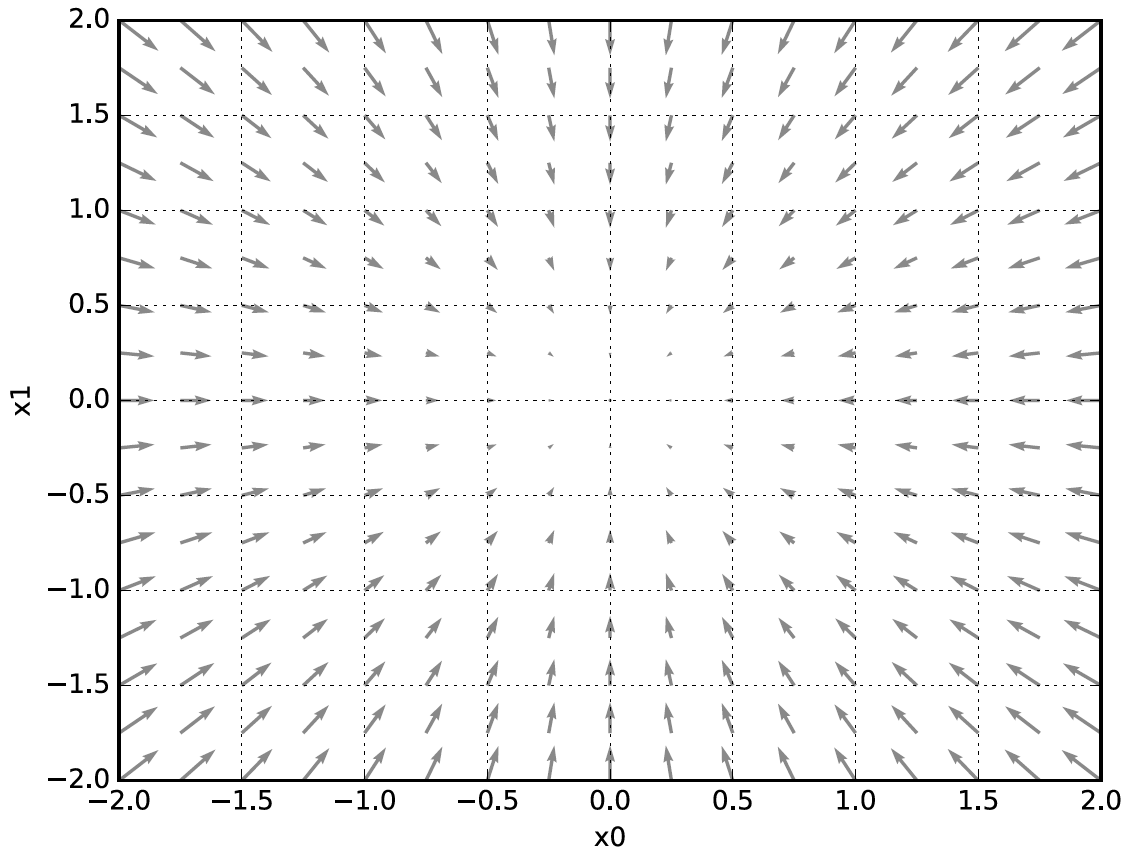

  - 기울기 그림은 방향을 가진 벡터(화살표)로 그려집니다.
  - 기울기가 가장낮은 장소를 가르킨다.
  - **기울기가 가르키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향**

###4.4.1 경사법(경사 하강법)


$$ x_{0} = x_{0} - \eta \dfrac{\partial f}{\partial x_{0}}$$

$$ x_{1} = x_{1} - \eta \dfrac{\partial f}{\partial x_{1}}$$


그림 4-10 경사법에 의한 $$f(x_0, x_1) = x_0^2 + x_1^2$$의 갱신과정 : 점선은 함수의 고등선을 나타낸다.

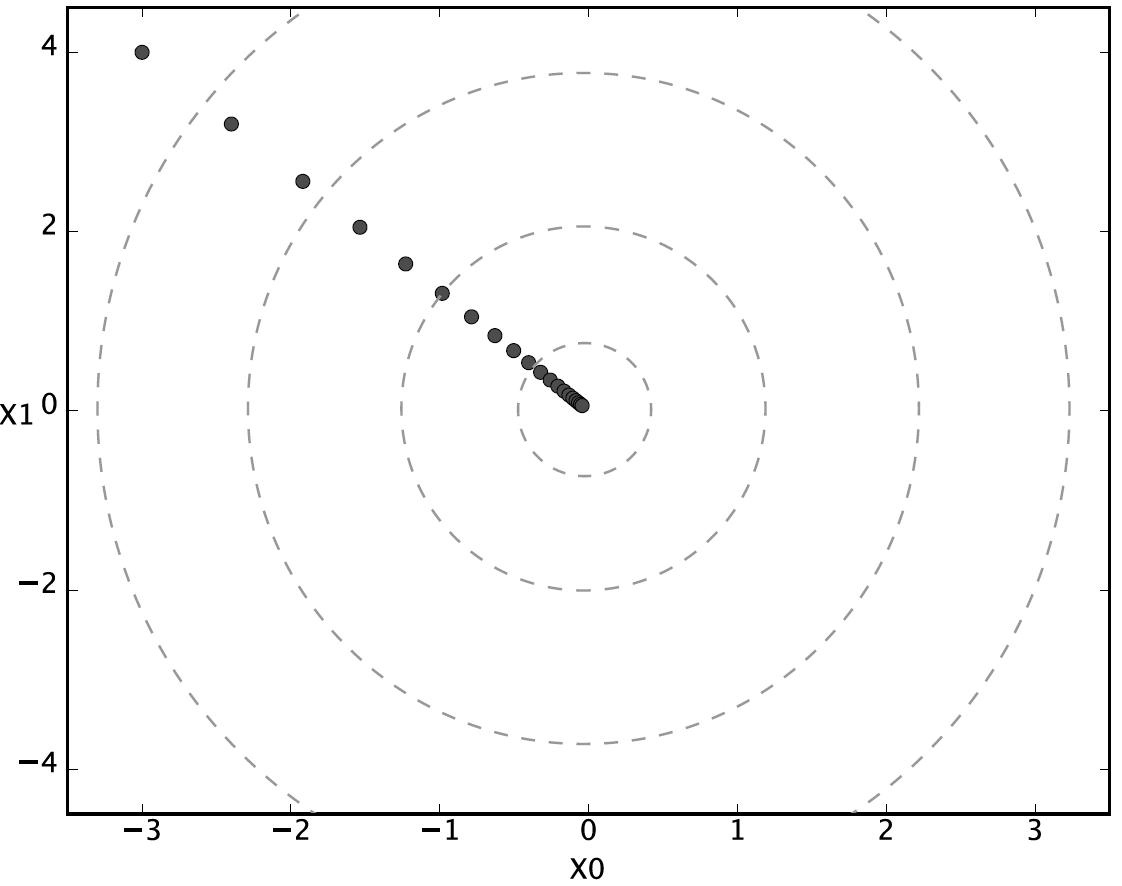

경사법으로 $$f(x_0, x_1) = x_0^2 + x_1^2$$의 최소값을 구해라

[-6.11110793e-10  8.14814391e-10]
[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


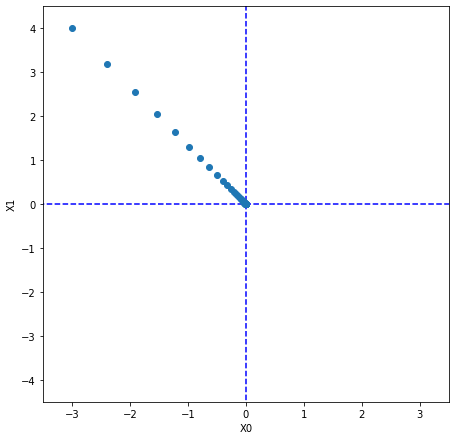

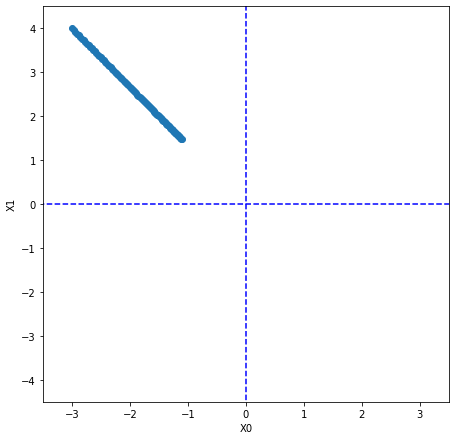

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)


# 경사법으로 f(x0, x1) = x0² + x1²의 최솟값을 구해라
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1)
print(x)  # [ -6.11110793e-10   8.14814391e-10]

# 학습률이 너무 큼
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=10.0)
print(x)  # [ -2.58983747e+13  -1.29524862e+12] 발산함

# 학습률이 너무 작음
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=1e-10)
print(x)  # [-2.99999994  3.99999992] 거의 변화 없음

# 그래프
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=100)
plt.figure(figsize=(16, 16))
plt.subplot(222)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")


plt.figure(figsize=(16, 16))
plt.subplot(223)

init_x = np.array([-3.0, 4.0])
#x, x_history = gradient_descent(function_2, init_x, lr=0.0001, step_num=100)
#x, x_history = gradient_descent(function_2, init_x, lr=0.001, step_num=100)
x, x_history = gradient_descent(function_2, init_x, lr=0.005, step_num=100)
plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

- simplet net


 - softmax 는 확률값
 - loss 는 계산한 값과 확률 값을 리턴


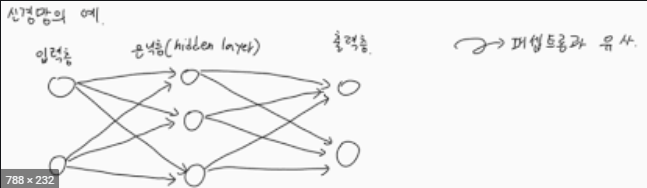

###4.4.2 신경망에서 기울기

$$ W = \left(\begin{array}{rrr}
w_{11}&w_{12}&w_{13}\\
w_{21}&w_{22}&w_{23}
\end{array}\right)$$

$$ \dfrac{\partial L}{\partial W} = \left(\begin{array}{rrr}
\dfrac{\partial L}{\partial w_{11}}&\dfrac{\partial L}{\partial w_{12}}&\dfrac{\partial L}{\partial w_{13}}\\
\dfrac{\partial L}{\partial w_{21}}&\dfrac{\partial L}{\partial w_{22}}&\dfrac{\partial L}{\partial w_{23}}
\end{array}\right)$$


$$ {W} = \left(\begin{array}{rrr}
w_{11} - a \dfrac{\partial L}{\partial w_{11}}&w_{12} - a \dfrac{\partial L}{\partial w_{12}}&w_{13} - a \dfrac{\partial L}{\partial w_{13}}\\
w_{21} - a \dfrac{\partial L}{\partial w_{21}}&w_{22} - a \dfrac{\partial L}{\partial w_{22}}&w_{23} - a \dfrac{\partial L}{\partial w_{23}}
\end{array}\right)$$

SimpleNet과 TwoLayerNet를 위한 함수 구현

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# 수치미분 함수에서는 반복문 for 문을 사용하지 않고 np.nditer 를 사용하여 반복문을 처리하는 구문을 사용하였습니다.
# numerical_gradient 함수의 인자 f는 Loss 함수 이고 인자 x는 weight 값인데 2차원으로 되어져 있어서 단순히 for 문을 사용을 할 수 없습니다.
# 이러한 경우 np.nditer를 사용하여 반복문을 작성해야 합니다.

# 참고 사이트 입니다.
# https://kosb.tistory.com/42
# https://numpy.org/doc/stable/reference/generated/numpy.nditer.html
# https://transferhwang.tistory.com/278
# https://homzzang.com/b/py-318

def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) # 1
    while not it.finished:    # 2
        idx = it.multi_index  # 3
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()         # 4
    return grad

Simple Network class 구현

In [ ]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [ ]:
net = simpleNet()
print(net.W)

[[ 0.277496    2.17977826  0.3491941 ]
 [ 0.05473923  0.72766257 -1.29303191]]


In [ ]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])


z=net.predict(x)
y = softmax(z)
print(y)


[0.14188943 0.81407169 0.04403888]


In [ ]:
for i in range(10000):
    f = lambda w: net.loss(x, t)
    dW = numerical_gradient(f, net.W)

    print(dW)
    print(net.loss(x, t))
    #print(f(w)))
    net.W -= 0.001 * dW
    #print(net.W)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [ 0.03394564  0.04896392 -0.08290956]]
0.09664497355164332
[[ 0.02262733  0.03263751 -0.05526484]
 [ 0.03394099  0.04895626 -0.08289726]]
0.09662991812143132
[[ 0.02262423  0.03263241 -0.05525664]
 [ 0.03393635  0.04894861 -0.08288496]]
0.09661486717542309
[[ 0.02262114  0.0326273  -0.05524844]
 [ 0.03393171  0.04894096 -0.08287266]]
0.09659982071167814
[[ 0.02261804  0.0326222  -0.05524025]
 [ 0.03392706  0.04893331 -0.08286037]]
0.09658477872825776
[[ 0.02261495  0.03261711 -0.05523206]
 [ 0.03392242  0.04892566 -0.08284808]]
0.0965697412232234
[[ 0.02261186  0.03261201 -0.05522387]
 [ 0.03391778  0.04891801 -0.0828358 ]]
0.09655470819463875
[[ 0.02260876  0.03260691 -0.05521568]
 [ 0.03391315  0.04891037 -0.08282352]]
0.09653967964056795
[[ 0.02260567  0.03260182 -0.05520749]
 [ 0.03390851  0.04890273 -0.08281124]]
0.09652465555907636
[[ 0.02260258  0.03259673 -0.05519931]
 [ 0.03390387  0.04889509 -0.08279897]]
0.09650963594822978
[[ 0.02259949 

In [ ]:
z=net.predict(x)
y = softmax(z)
print(y)

[0.030677   0.04302895 0.92629405]


## 4.5 학습 알고리즘 구현하기
 - 1단계 미니 배치
 - 2단계 기울기 산출
 - 3단계 매개변수 갱신
 - 4단계 반복

###4.5.1 2층 신경망 클래스 구현하기


Two Layer Network class 구현


In [ ]:
class TwoLayerNet:
    """
    params : 신경망의 매개변수를 보관하는 딕셔너리 변수.
    params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향.
    params['W2']은 2번째 층의 가중치, params['b2']은 2번째 층의 편향.
    grad : 기울기를 보관하는 딕셔너리 변수(numerical_gradient()의 반환값)
    grads['W1']은 1번째 층의 가중치의 기울기, grads['b1']은 1번째 층의 편향의 기울기.
    grads['W2']은 2번째 층의 가중치의 기울기, grads['b2']은 2번째 층의 편향의 기울기.
    """
    # 초기화를 수행한다.
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \   #
            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']


        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        #sigmoid 활성화함수

        # softmax y의 확률값
        return y

    # 손실 함수의 값을 구한다.
    # x : 입력데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        #결과의 확률값과 원핫인코딩된 값을 비교
        return cross_entropy_error(y, t)

    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # 가중치 매개변수의 기울기를 구한다.
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
    '''   '''
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        #print(x.shape)
        #print(W1.shape)
        #print(b1.shape)
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)  # (784, 100)
print(net.params['b1'].shape)  # (100,)
print(net.params['W2'].shape)  # (100, 10)
print(net.params['b2'].shape)  # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [ ]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
y = net.predict(x)
print(y.shape)

(100, 10)


수치 미분으로 gradient descent 구현하기
 - 실행하는데 시간이 많이 걸림
 - 수치 미분이 너무 많은 시간이 걸리는 것을 보여주는 예제 임으로 실행되는 중간에 중단시켜도 무방함

In [ ]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)   # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)  # 기울기 계산
    # 주의 : 실행하는데 아주 오래걸림
    # 나중에 표시 필요
print(grads['W1'].shape)  # (784, 100)
print(grads['b1'].shape)  # (100,)
print(grads['W2'].shape)  # (100, 10)
print(grads['b2'].shape)  # (10,)

###4.5.2 미니배치 학습 구현하기
  - 학습만 진행됨
  - test는4.5.3에서 진행
  - 미니배치 : 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대하여 경사법으로 매개변수를 갱신한다.

그림 4-11 손실함수의 추이 : 왼쪽은 10,000회 반복까지의 추이, 오른쪽은 1000회 반복까지의 추이

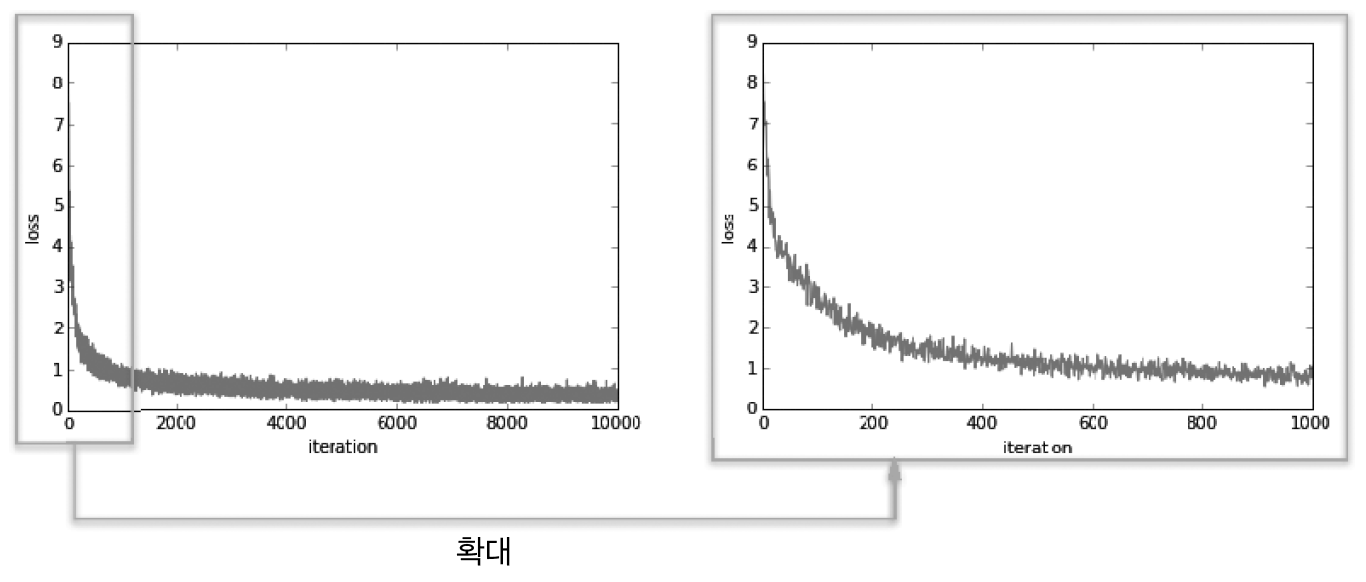

수치 미분과 공식에 의한 미분의 차이를 보기 위해서 아래와 같이 두번 실행한다.

    - grad = network.numerical_gradient(x_batch, t_batch)
    - #grad = network.gradient(x_batch, t_batch)

한번씩 주석을 풀고 실행해 보면 실행 속도를 알 수 있을 것이다.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


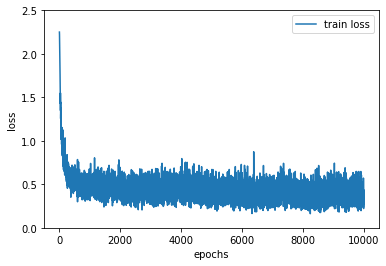

In [ ]:
import tensorflow as tf
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
t_train=tf.keras.utils.to_categorical(t_train)
t_test=tf.keras.utils.to_categorical(t_test)
x_train=x_train.reshape(60000,-1)
x_test=x_test.reshape(10000,-1)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

# 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()                   # 위
#plt.legend(loc='lower right') # 아래
plt.show()

###4.5.3 시험 데이터로 평가하기


train acc, test acc | 0.09988333333333334, 0.099


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


train acc, test acc | 0.8528333333333333, 0.8579
train acc, test acc | 0.8594166666666667, 0.8704
train acc, test acc | 0.8659833333333333, 0.8685
train acc, test acc | 0.8514, 0.8535
train acc, test acc | 0.8423833333333334, 0.8487
train acc, test acc | 0.8669333333333333, 0.8695
train acc, test acc | 0.8683, 0.8669
train acc, test acc | 0.8430166666666666, 0.8471
train acc, test acc | 0.86775, 0.8694
train acc, test acc | 0.8754666666666666, 0.8786
train acc, test acc | 0.8813833333333333, 0.8849
train acc, test acc | 0.88175, 0.8864
train acc, test acc | 0.8797333333333334, 0.8799
train acc, test acc | 0.8805333333333333, 0.8808
train acc, test acc | 0.8952333333333333, 0.8961
train acc, test acc | 0.87965, 0.882



훈련데이터와 시험 데이터에 대한 정확도 추이


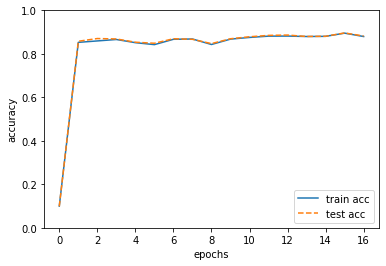

In [ ]:
import tensorflow as tf
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
t_train=tf.keras.utils.to_categorical(t_train)
t_test=tf.keras.utils.to_categorical(t_test)
x_train=x_train.reshape(60000,-1)
x_test=x_test.reshape(10000,-1)


network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

print("\n\n\n훈련데이터와 시험 데이터에 대한 정확도 추이")
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()  #acc 값 보여주기

##4.6 정리
 - 손실함수(지표)를 기준으로 그 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것이 신경망 학습의 목표

 - 배운것
   - 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험데이터로 나눠 사용한다.
   - 훈련 데이터에서 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
   - 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
   - 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
   - 아주 작은 값을 주었을 때의 차분으로 미분을 구하는 것을 수치 미분이라고 한다.
   - 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
   - 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 다소 복잡한 오차역전파법은 기울기를 고속으로 구할 수 있다.

부록

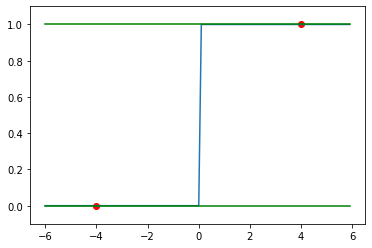

In [ ]:
# 그림 4-4 계단함수와 시그모이드 함수: 계단 함수는 대부분의 장소에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)는 0이 아니다.
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-6.0, 6.0, 0.1)
y1 = step_function(x)
y2 = np.array([1 for _ in range(x.size)])
y3 = np.array([0 for _ in range(x.size)])
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[1,0],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

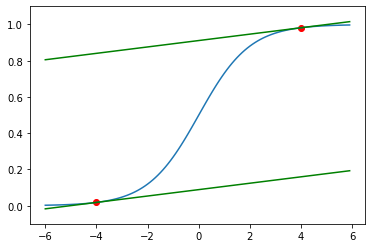

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x) * (1 - sigmoid(x))

def 시그모이드_접선(x): # 접선 ax+b에서 a,b 값을 리턴
    return sigmoid_diff(x), sigmoid(x) - sigmoid_diff(x) * x

x = np.arange(-6.0, 6.0, 0.1)
y1 = sigmoid(x)
a2, b2 = 시그모이드_접선(4)
y2 = a2 * x + b2
a3, b3 = 시그모이드_접선(-4)
y3 = a3 * x + b3
plt.plot(x, y1)
plt.plot(x, y2, color='green')
plt.plot(x, y3, color='green')
plt.scatter([4,-4],[a2*4+b2,a3*-4+b3],color='red')

plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

수치 미분에 의한 기울기 그래프를 표시하고 경사강화법적용
  - learning rate를 달리해 가면서 기울기를 관찰한다.

  - lr = 2.0    # 발산
  - lr = 1.0    # zig zag
  - lr = 0.5    # one time
  - lr = 0.4
  - lr = 0.2
  - lr = 0.1

In [ ]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

x shape : (100,)
x : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
y shape : (100,)
y : [  5.     4.01   3.04   2.09   1.16   0.25  -0.64  -1.51  -2.36  -3.19
  -4.    -4.79  -5.56  -6.31  -7.04  -7.75  -8.44  -9.11  -9.76 -10.39
 -11.   -11.59 -12.16 -12.71 -13.24 -13.75 -14.24 -14.71 -15.16 -15.59
 -16.   -16.39 -16.76 -17.11 -17.44 -17.75 -18.04 -18.31 -18.56 -18.79
 -19.   -19.19 -19.36 -19.51 -19.64 -19.75 -19.84 -19.91 -19.96 -19.99
 -20.   -19.99 -19.96 -19.91 -19.84 -19.75 -19.64 -19.51 -19.36 -19.19
 -19.   -18.79 -18.56 -18.31 -18.04 -17.75 -17.44 -17.11 -16.76 -16.39
 -16.   -15.59 -15.16 -14.71 -14.24 -13.75 -13.24 -12.

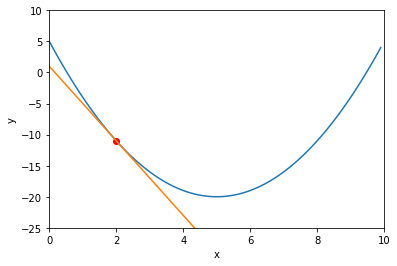

next x : 3.2
y for next x : -16.759999999999998
gradient for next x : -3.5999999999999996


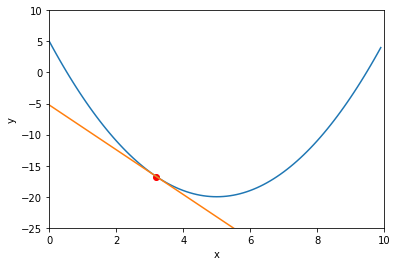

next x : 3.92
y for next x : -18.833600000000004
gradient for next x : -2.16


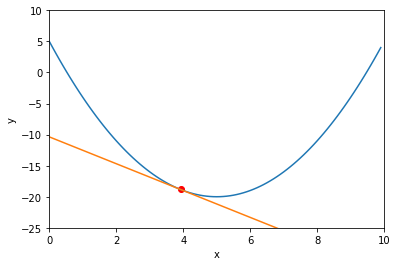

next x : 4.352
y for next x : -19.580096
gradient for next x : -1.2959999999999994


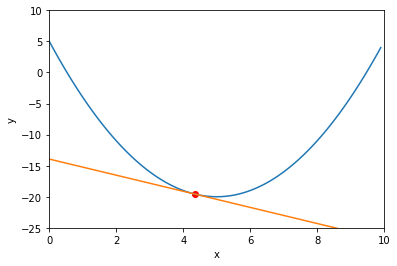

next x : 4.6112
y for next x : -19.84883456
gradient for next x : -0.7775999999999996


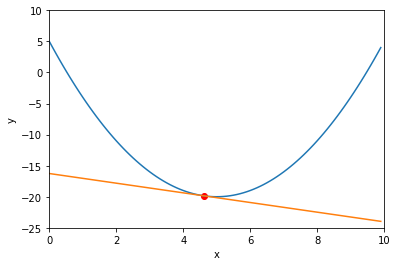

next x : 4.76672
y for next x : -19.945580441599997
gradient for next x : -0.4665599999999994


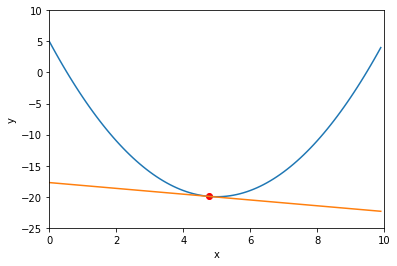

next x : 4.860032
y for next x : -19.980408958976
gradient for next x : -0.2799359999999993


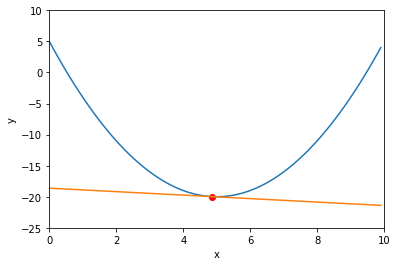

next x : 4.9160192
y for next x : -19.99294722523136
gradient for next x : -0.16796159999999993


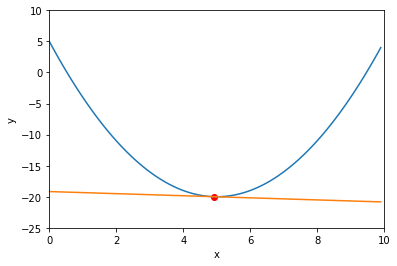

next x : 4.94961152
y for next x : -19.99746100108329
gradient for next x : -0.10077695999999925


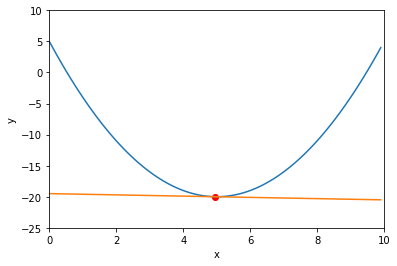

next x : 4.969766912
y for next x : -19.999085960389987
gradient for next x : -0.06046617600000026


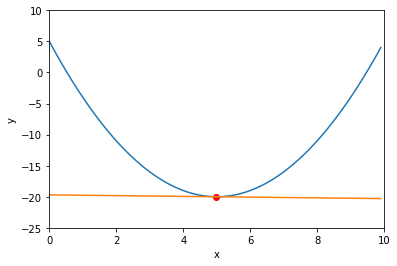

next x : 4.9818601472
y for next x : -19.99967094574039
gradient for next x : -0.036279705600000156


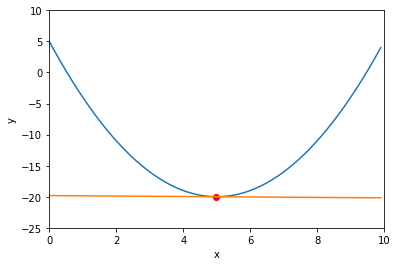

next x : 4.98911608832
y for next x : -19.99988154046654
gradient for next x : -0.021767823359999383


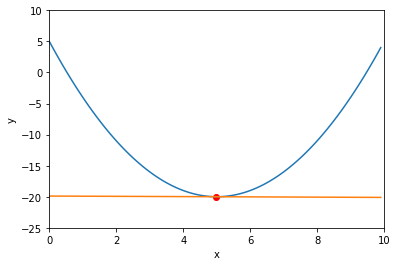

In [ ]:
def temp_function(x):
    return x**2 - 10*x + 5

def temp_gradient(x):
    return 2 * x - 10

def gradient_function(x, xp, yp, dy):
    return dy * (x - xp) + yp

x = np.arange(0.0, 10.0, 0.1)
y = temp_function(x)
print("x shape :", x.shape)
print("x :", x)
print("y shape :", y.shape)
print("y :", y)

print("==========")

#lr = 2.0    # 발산
#lr = 1.0    # zig zag
#lr = 0.5    # one time
#lr = 0.4
lr = 0.2
#lr = 0.1

#plt.figure(figsize=(16, 8))

# first step.
input_x = 2.0
input_y = temp_function(input_x)
input_gradient = temp_gradient(input_x)
line_y = gradient_function(x, input_x, input_y, input_gradient)
print("input x :", input_x)
print("y for input x:", input_y)
print("gradient for input x:", input_gradient)

# print figures.
#plt.subplot(121)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-25, 10)
plt.plot(x, y)
plt.plot(x, line_y)
plt.scatter(input_x,input_y, c='r')
plt.show()
print("==========")

# second step.
next_x = input_x - lr * temp_gradient(input_x)
next_y = temp_function(next_x)
next_gradient = temp_gradient(next_x)
line_y2 = gradient_function(x, next_x, next_y, next_gradient)
print("next x :", next_x)
print("y for next x :", next_y)
print("gradient for next x :", next_gradient)

#plt.subplot(122)
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 10)
plt.ylim(-25, 10)
plt.plot(x, y)
plt.plot(x, line_y2)
plt.plot(next_x, next_y)
plt.scatter(next_x, next_y, c='r')
plt.show()
print("==========")

for i in range(1, 11):
    # second step.
    next_x = next_x - lr * temp_gradient(next_x)
    next_y = temp_function(next_x)
    next_gradient = temp_gradient(next_x)
    line_y2 = gradient_function(x, next_x, next_y, next_gradient)
    print("next x :", next_x)
    print("y for next x :", next_y)
    print("gradient for next x :", next_gradient)

    #plt.subplot(122)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 10)
    plt.ylim(-25, 10)
    plt.plot(x, y)
    plt.plot(x, line_y2)
    plt.plot(next_x,next_y)
    plt.scatter(next_x, next_y, c='r')
    plt.show()
    print("==========")

ch04/gradient_1d.py

0.1999999999990898


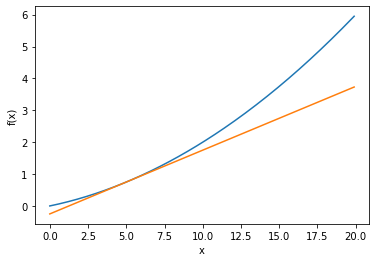

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

ch04/gradient_2d.py

No handles with labels found to put in legend.


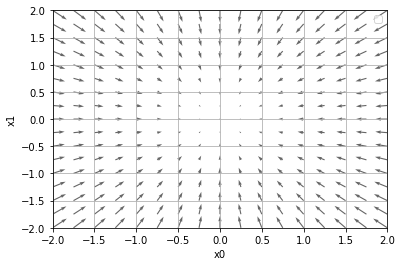

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

ch04/gradient_method.py

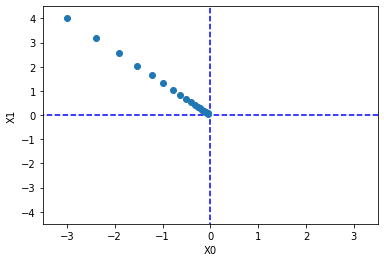

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

ch04/gradient_simplenet.py

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
#from common.functions import softmax, cross_entropy_error
#from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.16748576  0.18528391 -0.35276967]
 [ 0.25122864  0.27792587 -0.52915451]]


train acc, test acc | 0.1868, 0.1876


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


train acc, test acc | 0.8528833333333333, 0.8581
train acc, test acc | 0.8532333333333333, 0.8584
train acc, test acc | 0.8664, 0.8758
train acc, test acc | 0.8712, 0.8712
train acc, test acc | 0.8545833333333334, 0.8624
train acc, test acc | 0.8686666666666667, 0.8721
train acc, test acc | 0.8651833333333333, 0.8688
train acc, test acc | 0.88275, 0.8862
train acc, test acc | 0.88015, 0.8796
train acc, test acc | 0.85685, 0.863
train acc, test acc | 0.87555, 0.8786
train acc, test acc | 0.8773166666666666, 0.8782
train acc, test acc | 0.8834, 0.8894
train acc, test acc | 0.8747833333333334, 0.8737
train acc, test acc | 0.8872833333333333, 0.8872
train acc, test acc | 0.8962333333333333, 0.8989


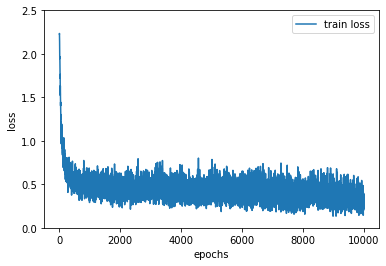

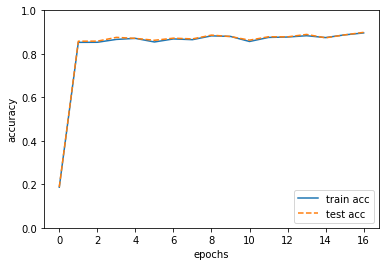

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
#from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

# 데이터 읽기
#(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
#=====
import tensorflow as tf
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()
t_train=tf.keras.utils.to_categorical(t_train)
t_test=tf.keras.utils.to_categorical(t_test)
x_train=x_train.reshape(60000,-1)
x_test=x_test.reshape(10000,-1)
#=====


network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))



# 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()                   # 위
#plt.legend(loc='lower right') # 아래
plt.show()

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

softmax에서 전치를 하지 않은 경우

```
def softmax(x):
    if x.ndim == 2:
        # 각 행마다 최대값을 계산하고, 이를 뺀다 (오버플로우 방지)
        x = x - np.max(x, axis=1, keepdims=True)
        # 각 행마다 Softmax를 계산
        y = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
        return y

    # 1차원 배열인 경우 (벡터), 기본 Softmax 계산
    x = x - np.max(x)  # 오버플로우 대책
    return np.exp(x) / np.sum(np.exp(x))
```

